# Linear regression with Torch

In [1]:
import torch
from torch import optim, nn

In [2]:
from utils_torch import train_test_split

## Data set

In [3]:
y = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

# inputs have shape batch_size × num_features

y = torch.tensor(y).unsqueeze(1)
x = torch.tensor(x).unsqueeze(1)

In [4]:
x_train, y_train, x_val, y_val = train_test_split(x, y)

## Model

In [5]:
n_hidden = 8

model = nn.Sequential(
    nn.Linear(1, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, 1),
)

In [6]:
model

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

## Optimizer

In [7]:
optimizer = optim.Adam(model.parameters(), lr=1e-2)

## Loss function

In [8]:
loss_fn = nn.MSELoss()

## Standard training loop

In [9]:
def training_loop(n_epochs, optimizer, model, 
                  x_train, y_train, x_val, y_val):
    for epoch in range(1, 1+n_epochs):
        yhat_train = model(x_train)
        loss_train = loss_fn(yhat_train, y_train)
        
        yhat_val = model(x_val)
        loss_val = loss_fn(yhat_val, y_val)

        optimizer.zero_grad() 
        loss_train.backward() 
        optimizer.step()
        
        if epoch == 1 or epoch % 500 == 0:
            print(f'Epoch {epoch:10d}, Train loss {loss_train:f}, Val loss {loss_val:f}')

## Model fitting with training and validation loss

In [10]:
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    model=model,
    x_train =x_train,
    y_train = y_train,
    x_val = x_val,
    y_val = y_val
)

Epoch          1, Train loss 221.678818, Val loss 125.135101
Epoch        500, Train loss 41.640900, Val loss 26.883430
Epoch       1000, Train loss 20.664299, Val loss 10.388848
Epoch       1500, Train loss 11.920036, Val loss 4.535814
Epoch       2000, Train loss 7.489810, Val loss 2.186558
Epoch       2500, Train loss 5.308661, Val loss 1.793931
Epoch       3000, Train loss 4.137653, Val loss 1.453954
Epoch       3500, Train loss 3.473230, Val loss 1.084425
Epoch       4000, Train loss 3.064878, Val loss 1.258345
Epoch       4500, Train loss 2.807263, Val loss 1.431513
Epoch       5000, Train loss 2.617709, Val loss 1.276051


In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
xp = np.arange(20, 90, 0.1, dtype='float32')[:, None]

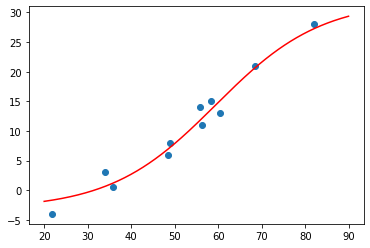

In [13]:
plt.plot(x, y, 'o')
plt.plot(xp, model(torch.tensor(xp)).detach().numpy(), 'r-')
pass